<a href="https://colab.research.google.com/github/anandaptralmira/clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Import Dataset
df = pd.read_csv('https://raw.githubusercontent.com/anandaptralmira/clustering/main/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [27]:
# Prints the Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [28]:
# Prints Descriptive Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [29]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

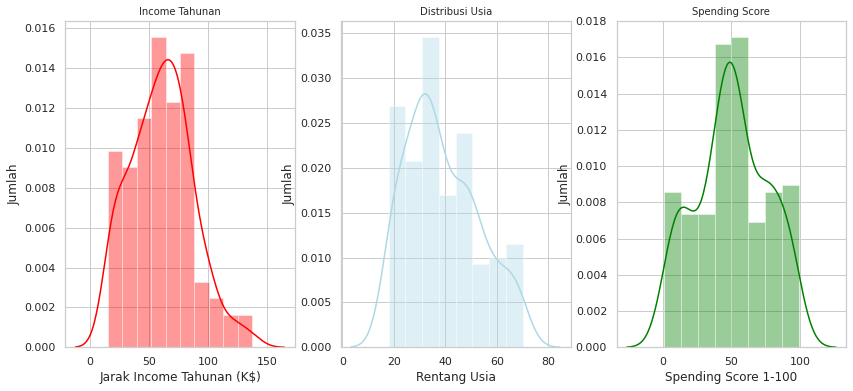

In [30]:
plt.rcParams['figure.figsize']=(14,6)

plt.subplot(1, 3, 1)
sns.set(style= 'whitegrid')
sns.distplot(df['Annual Income (k$)'], color='red') 
plt.title('Income Tahunan', fontsize=10)
plt.xlabel('Jarak Income Tahunan (K$)')
plt.ylabel('Jumlah')

plt.subplot(1, 3, 2)
sns.set(style= 'whitegrid')
sns.distplot(df['Age'], color='lightblue')
plt.title('Distribusi Usia', fontsize=10)
plt.xlabel('Rentang Usia')
plt.ylabel('Jumlah')

plt.subplot(1, 3, 3)
sns.set(style= 'whitegrid')
sns.distplot(df['Spending Score (1-100)'], color='green')
plt.title('Spending Score', fontsize=10)
plt.xlabel('Spending Score 1-100')
plt.ylabel('Jumlah')

plt.show()

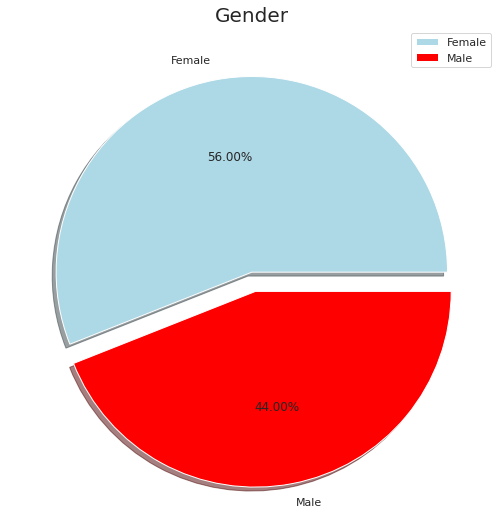

In [31]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['lightblue', 'red']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()


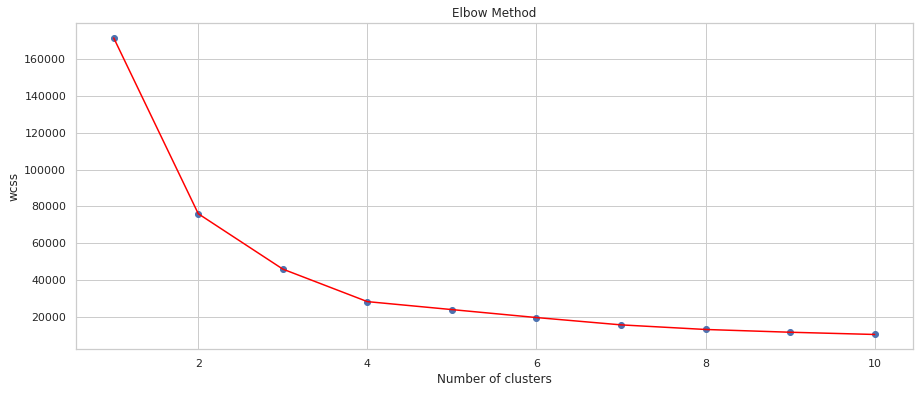

In [36]:
# Transform Data Frame to Numpy Array
age_spend = df[['Age','Spending Score (1-100)']].to_numpy()

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(income_spend)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1,11),wcss, 'o')
plt.plot(range(1,11),wcss, color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [37]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

temp = 0
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(income_spend)
    label = kmeans.labels_
    sil_coeff = silhouette_score(age_spend, label, metric='euclidean')
    if (sil_coeff > temp):
      temp = sil_coeff
      best = n_cluster
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))
print('\nBest Cluster = ',best)


For n_clusters=2, The Silhouette Coefficient is 0.4692341232501655
For n_clusters=3, The Silhouette Coefficient is 0.45300127016521263
For n_clusters=4, The Silhouette Coefficient is 0.49973941540141753
For n_clusters=5, The Silhouette Coefficient is 0.44526667994351227
For n_clusters=6, The Silhouette Coefficient is 0.43762552403747423
For n_clusters=7, The Silhouette Coefficient is 0.42313509747504796
For n_clusters=8, The Silhouette Coefficient is 0.432235979473907
For n_clusters=9, The Silhouette Coefficient is 0.41645966011773394
For n_clusters=10, The Silhouette Coefficient is 0.3976902668990543

Best Cluster =  4


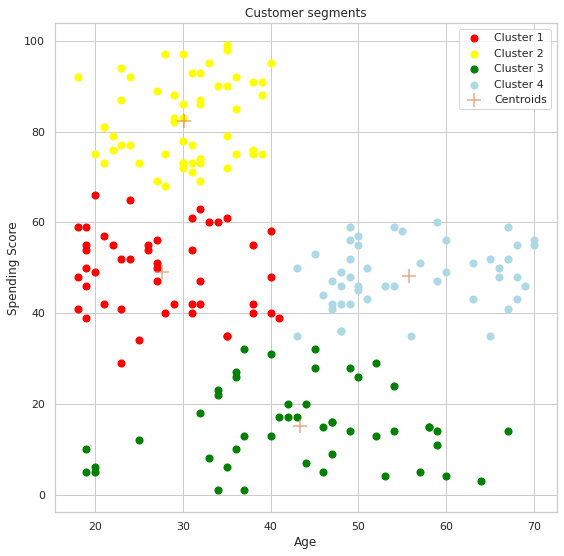

In [39]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(age_spend)

# Visualising Clusters for k=4
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.scatter(age_spend[cluster == 0, 0], age_spend[cluster == 0, 1], s = 50, label = 'Cluster 1', c='red')
plt.scatter(age_spend[cluster == 1, 0], age_spend[cluster == 1, 1], s = 50, label = 'Cluster 2', c='yellow')
plt.scatter(age_spend[cluster == 2, 0], age_spend[cluster == 2, 1], s = 50, label = 'Cluster 3', c='green')
plt.scatter(age_spend[cluster == 3, 0], age_spend[cluster == 3, 1], s = 50, label = 'Cluster 4', c='lightblue')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='+', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

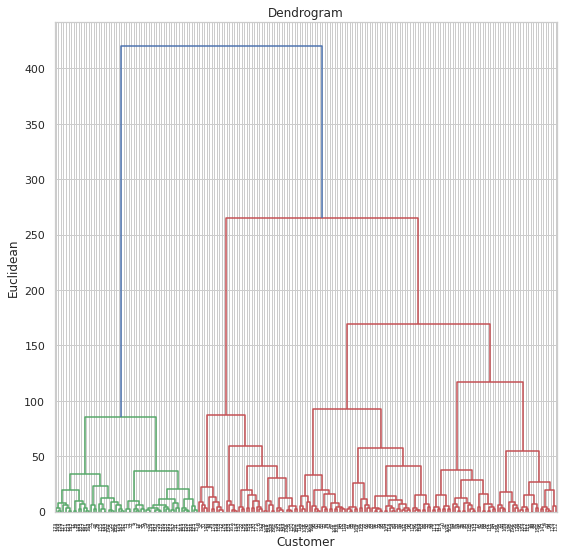

In [40]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(age_spend, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()


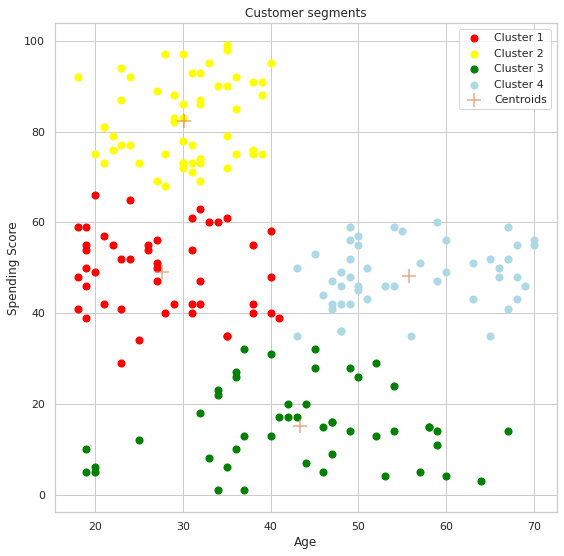

In [41]:
# Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hcluster = hc.fit_predict(age_spend)
# Visualising Clusters for k=4
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.scatter(age_spend[cluster == 0, 0], age_spend[cluster == 0, 1], s = 50, label = 'Cluster 1', c='red')
plt.scatter(age_spend[cluster == 1, 0], age_spend[cluster == 1, 1], s = 50, label = 'Cluster 2', c='yellow')
plt.scatter(age_spend[cluster == 2, 0], age_spend[cluster == 2, 1], s = 50, label = 'Cluster 3', c='green')
plt.scatter(age_spend[cluster == 3, 0], age_spend[cluster == 3, 1], s = 50, label = 'Cluster 4', c='lightblue')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='+', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()